<a href="https://colab.research.google.com/github/Mccready-Asher/EECS-3401-Assignment-2/blob/main/A2_Asher_McCready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2, EECS3401
Asher McCready, 218124149

Task 1

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)




ConnectionError: ignored

Task 2

In [ ]:
X.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [ ]:
X.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
X.shape

(48842, 14)

Task 2.1

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

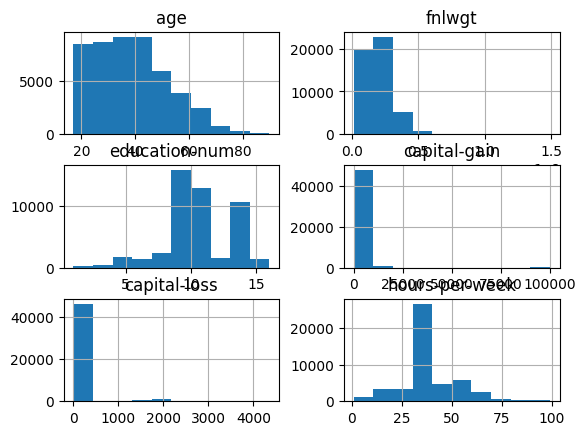

In [ ]:
X.hist()

Task 3

In [ ]:
X[X=='?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

Task 4

In [ ]:
X=X.replace(['?'],np.nan)
X.info()
X[X=='?'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Task 5

In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_prepared = X.copy(); #version of x to be processed

numimr = SimpleImputer(missing_values=np.nan, strategy='mean') #imputer for numerical stuff
catimr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False)

numcol = X.select_dtypes('number').columns
catcol = X.select_dtypes('object').columns

for c in numcol:
  X_prepared[c]=scaler.fit_transform(numimr.fit_transform(X_prepared[c].to_numpy().reshape(-1,1)))

for c in catcol:
  X_prepared[c]=catimr.fit_transform(X_prepared[c].to_numpy().reshape(-1,1))

enc_cat = pd.DataFrame(encoder.fit_transform(X_prepared[catcol]))

X_prepared = X_prepared.join(enc_cat)

for c in catcol:
  X_prepared.drop(c,axis=1,inplace=True)

print(X_prepared.shape)

X_prepared.columns = X_prepared.columns.astype(str)

(48842, 105)


Task 6

In [ ]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

Task 7

In [ ]:
y=y.replace(['<=50K.', '>50K.'], ['<=50K', '>50K'])
y.value_counts()

income
<=50K     37155
>50K      11687
dtype: int64

Task 8


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(39073, 105) (9769, 105) (39073, 1) (9769, 1)


Task 9

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel='poly',C=0.1,gamma=1)
model_svm.fit(X_train, y_train.values.ravel())

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(kernel='poly',C=0.1,gamma=1)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())


SVC(C=0.1, gamma=1, kernel='poly')

Task 9.1

In [ ]:
from sklearn.metrics import classification_report
y_predict = model_svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7433
        >50K       0.61      0.56      0.58      2336

    accuracy                           0.81      9769
   macro avg       0.74      0.72      0.73      9769
weighted avg       0.80      0.81      0.81      9769



Task 9.2

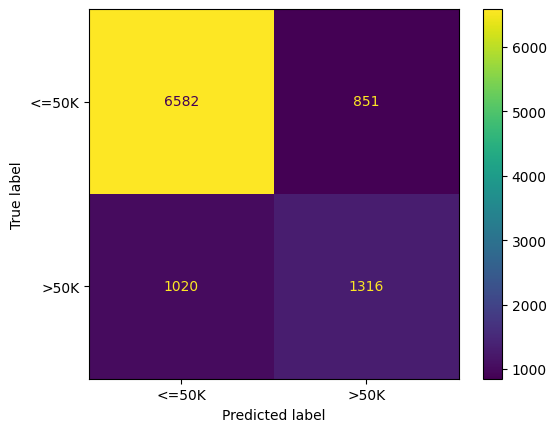

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

Task 10

Task 10.1

In [ ]:
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)
print(X_train. shape, y_train. shape, X_validation. shape, y_validation.shape, X_test. shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


Task 10.2

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_parameters = {'kernel': ['rbf'],'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 1, 10] }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

0.8472563472563472

In [ ]:
print(svm_winner)

SVC(C=10, gamma=0.01)
